In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('../')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Lauren's colors
L_colors = ['red', 'darkorange', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']
L_markers = ['s', '^', 'v', 'd', 'P', "X", "*"]

In [4]:
# closure test? i.e. there is truth pythia data somewhere to compare to
closure = True

# define binnings
n_bins = 6 # WARNING RooUnfold seg faults if too many bins used
binning = np.array([5, 20, 40, 60, 80, 100, 150]).astype(float)
bincenters = get_lin_bincenters(binning)
binwidths = get_binwidths(binning)

labels = "jet $p_T$"

n_iter = 5

In [5]:
len(binning)

7

In [11]:
# file defs, hist imports

f_unfolded = ur.open("./unfolded_fr_new.root")
f_preunfold = ur.open("./preunfold_fr_new.root")

# Data, reco [theta_unknown_S]
h3_raw = f_preunfold["raw"]
h1_raw = f_preunfold["raw1D"]

# MC, reco [theta0_S]
h3_reco = f_preunfold["reco"]
h1_reco = f_preunfold["reco1D"]

# MC, true [theta0_G]
h3_gen = f_preunfold["gen"]
h1_gen = f_preunfold["gen1D"]

h3_unfolded = []
for i in range(1,n_iter+1):
    h3_unfolded.append(f_unfolded["Baysian_Unfoldediter{}".format(i)])

h1_unfolded = []
for i in range(1,n_iter+1):
    h1_unfolded.append(f_unfolded["Baysian_Unfolded1Diter{}".format(i)])


In [12]:
proj = lambda a : a.values()
proj_err = lambda a : a.errors()

theta0_G = proj(h1_gen)
theta0_S = proj(h1_reco)
theta_unknown_S = proj(h1_raw)

theta_unfolded = [proj(a) for a in h1_unfolded]

theta0_G_err = proj_err(h1_gen)
theta0_S_err = proj_err(h1_reco)
theta_unknown_S_err = proj_err(h1_raw)

theta_unfolded_err = [proj_err(a) for a in h1_unfolded]


In [13]:
# print total number of jets

print("N unfolded jets : ")
for i in range(len(theta_unfolded)):
    print("\t i={}, {} +/- {}".format(i, np.sum(theta_unfolded[i]), np.sum(theta_unfolded_err[i])))

# TODO propagate error from here to actaul eec calculation

N unfolded jets : 
	 i=0, 1024531.6190272995 +/- 1036.73938714082
	 i=1, 1024494.3840943283 +/- 1087.6273221516508
	 i=2, 1024492.3601918955 +/- 1095.2251398658168
	 i=3, 1024492.2246055932 +/- 1083.0282487793404
	 i=4, 1024492.220271908 +/- 1070.0232136199056


[372619. 175456.  95654.  55457.  33808.  41725.]
(6,)
[  5.  20.  40.  60.  80. 100. 150.]
7
(array([372619., 175456.,  95654.,  55457.,  33808.,  41725.]), array([  5.,  20.,  40.,  60.,  80., 100., 150.]), <BarContainer object of 6 artists>)
6
6


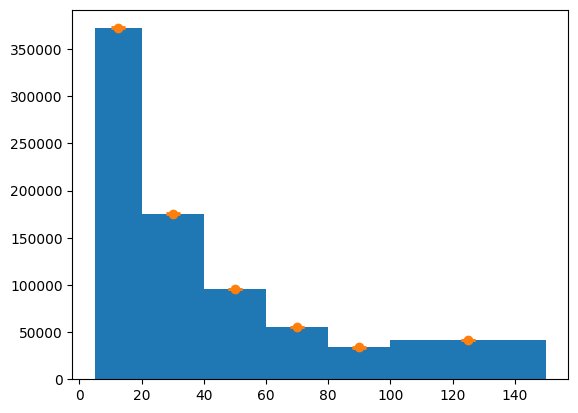

In [14]:
print(theta0_G)
print(theta0_G.shape)
print(binning)
print(len(binning))

print(plt.hist(binning[:-1], binning, weights=theta0_G))
print(len(binning[:-1]))
print(len(theta0_G_err))
plt.errorbar(bincenters, theta0_G, yerr=theta0_G_err, capsize=5, capthick=2, fmt='o', linestyle="None")
plt.show()

In [15]:
for iteration in range(n_iter):
    print(theta_unfolded[iteration])
    print(theta_unfolded_err[iteration])

[876980.32988841 114359.77840123  18424.08462927   6976.26100748
   3502.83831161   4288.3267893 ]
[869.34371051 123.4442289   25.23378598   9.18805539   4.47883447
   5.05077189]
[9.81818975e+05 3.95195049e+04 2.17493731e+03 5.26501756e+02
 2.10604053e+02 2.43861099e+02]
[974.33737669  90.35762053  13.84371606   4.74387293   2.16784121
   2.17689473]
[1.00847357e+06 1.55220878e+04 3.96010142e+02 6.29225149e+01
 1.89926368e+01 1.87814014e+01]
[1.00005814e+03 8.36010142e+01 8.12547333e+00 2.03174220e+00
 7.40008427e-01 6.68764821e-01]
[1.01692797e+06 7.44923346e+03 1.00945074e+02 1.00841047e+01
 2.20092469e+00 1.78944620e+00]
[1.00731356e+03 7.10990881e+01 3.76830606e+00 5.81903250e-01
 1.51812549e-01 1.13582694e-01]
[1.02036200e+06 4.09773505e+03 3.01921540e+01 1.82394161e+00
 2.83322613e-01 1.87865602e-01]
[1.00984080e+03 5.83549651e+01 1.63262866e+00 1.50319749e-01
 2.76268007e-02 1.68781564e-02]


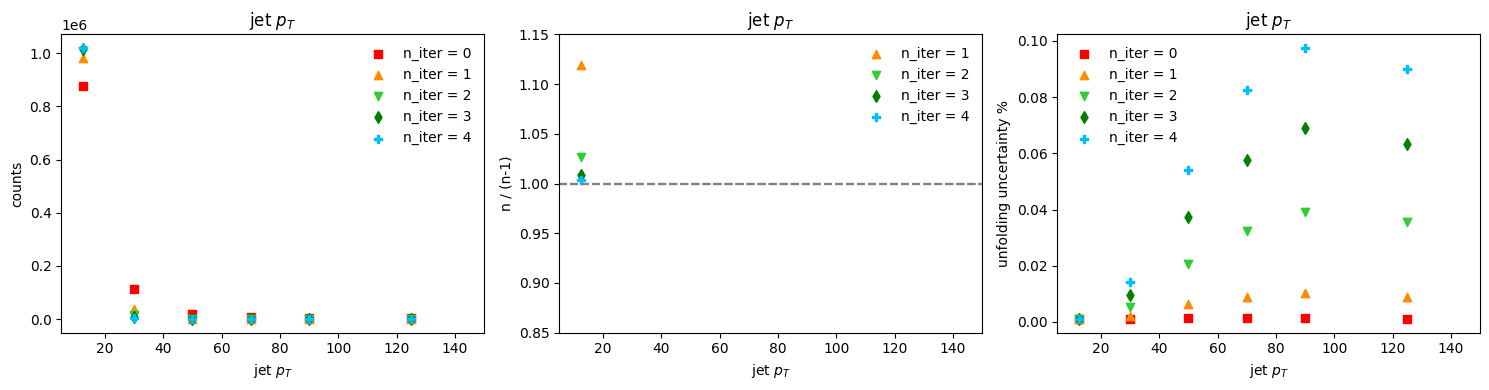

In [19]:
############################## UNFOLDED DISTRIBUTIONS ############################
# EEC distros

it = 5

fig, axes = plt.subplots(1, 3, figsize=(15,4))

pt_lims = [5, 150]

# COL 1: raw jet pt distribution WITH relative error over data, true underneath
ax = axes[0]

for iteration in range(it):

    ax.scatter(bincenters, theta_unfolded[iteration],color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)
    ax.set_ylabel("counts")
    
    ax.set_title(labels)
    ax.set_xlabel(labels)

    ax.legend(frameon=False)

    ax.set_xlim(pt_lims)

# COL 2: convergence plot (n / n - 1)
ax = axes[1]

for iteration in range(1,it):

    yvals = safe_divide(theta_unfolded[iteration], theta_unfolded[iteration-1], filler=1)
    ax.scatter(bincenters, yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.hlines(y=1, xmin=binning[0], xmax=binning[len(binning)-1], color='grey', linestyle='--')

    ax.set_title(labels)
    ax.set_xlabel(labels)
    ax.set_ylabel("n / (n-1)")
    ax.legend(frameon=False)

    ax.set_ylim([0.85, 1.15])
    ax.set_xlim(pt_lims)


# COL 3: statistical error %
ax = axes[2]

for iteration in range(it):
    
    yvals = safe_divide(theta_unfolded_err[iteration], theta_unfolded[iteration])
    ax.scatter(bincenters, yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.set_title(labels)
    ax.set_xlabel(labels)
    ax.set_ylabel("unfolding uncertainty %")
    ax.legend(frameon=False)

    ax.set_xlim(pt_lims)


fig.tight_layout()
plt.show()
